# Compare user accounts over time
We've seen a pretty consistent pattern of "forgetting" in the regressions on information status ([here](predict_anchor_from_prior_frequency.ipynb)), but is this due to user-level effects or a change in the user base over time? E.g. more locals in the early stages of crisis, followed by influx of non-locals and eventual return to locals => increase + decrease + increase in descriptor use.

In [2]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Load data

In [7]:
from importlib import reload
import predict_descriptor_in_twitter
reload(predict_descriptor_in_twitter)
from predict_descriptor_in_twitter import load_clean_data
data_file = '../../data/mined_tweets/combined_tweet_tag_data_NE_flat.gz'
combined_data = load_clean_data(data_file)

/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
## add RT users
import re
RT_MATCHER = re.compile('(?<=RT @)[A-Za-z0-9_]+(?=:)')
combined_data = combined_data.assign(**{'username_rt' : combined_data.loc[:, 'txt'].apply(lambda x: RT_MATCHER.search(x).group(0) if RT_MATCHER.search(x) is not None else '')})
## fix usernames
combined_data = combined_data.assign(**{'username_fixed' : combined_data.apply(lambda x: x.loc['username_rt'] if x.loc['username_rt'] != '' else x.loc['username'], axis=1)})
combined_data = combined_data.assign(**{'username_fixed' : combined_data.apply(lambda x: x.loc['username'].split(':')[-1], axis=1)})

## Find most frequent tweeters in each time period
Let's look at the top tweeters in each time period and examine their NE use.

In [15]:
top_k = 20
data_name_var = 'data_name_fixed'
user_var = 'username_fixed'
for data_name_i, data_i in combined_data.groupby(data_name_var):
    print('data=%s'%(data_name_i))
    user_counts_i = data_i.loc[:, user_var].value_counts()[:top_k]
    display(user_counts_i)

data=florence


AndyShain          34
USACEHQ            34
RyanJones229       31
fayobserver        29
MikeTheiss         27
AdamOwensTV        22
charitycrabtree    21
GloriaABC11        21
ai6yrham           21
WatchAmandaTV      19
EcoInternetDrGB    18
LtGovDanForest     18
ZacharysWeather    16
WJXT4Jonathan      16
DavidFox46         14
NickOchsnerWBTV    14
Angenette5         14
DE_SallyT          14
postandcourier     14
brandilmelb        14
Name: username_fixed, dtype: int64

data=harvey


statesman          134
reportermatt        85
BreakingNNow        84
CBieszad            70
souperfan2012       63
THUTO               62
abc13houston        60
NBCNightlyNews      59
TexasTribune        59
ABC                 58
Jackson_Dill        58
REALDANIELGLENN     57
ValGalvNews         55
joshdcaplan         53
NBCDFW              51
HoustonPubMedia     50
JMilesKHOU          49
windiewx            49
ErnestScheyder      48
g_ashleyhawkins     48
Name: username_fixed, dtype: int64

data=irma


SimpleWeatherFL    145
kkfla737           143
channel1america    129
JRiz11             105
CyberAnonymous      96
ktk985dotcom        87
hurricanenewsus     85
bluestreakdaily     80
windiewx            72
kotaknaren          72
WSTU1450            68
homegypsy           62
BDormanTV           62
hangoutmiami        60
Sorgitzak           60
torrea40            59
channel1atlanta     56
IanReitz            54
BN9                 52
EcoInternetDrGB     50
Name: username_fixed, dtype: int64

data=maria


Myraceisamerica    46
BookPuertoRico     26
ThePRMonitor       23
RelaxInPR          21
anndkar            18
noticiapr          16
johnlundin         16
DENISEVASQUEZ      13
Noti_PuertoRico    13
USCGSoutheast      13
MrRJervis          13
JennaLeeTV         12
mog7546            12
DBHnBuckhead       10
greavespg          10
LiberalNcali        9
LawrenceCOEM        9
EdmundHanlon        9
E_Sqrd_Affair       8
ASE                 8
Name: username_fixed, dtype: int64

data=michael


GulfPower          33
GulfCountySO       28
live_hurricane     27
TylerAllender      27
AustinKellerman    22
ReadCarlos         21
KWUrgentUpdate     20
TevinWooten        18
MAGAordie          17
PascoSheriff       17
Kirsten_TV         16
JNels              16
FLHSMV             15
USACEHQ            14
OSGNelson          14
nicstoltzfus       14
amlikethewind      14
SalArmyFlorida     13
EMS_Information    13
Rubiconski         13
Name: username_fixed, dtype: int64

In [21]:
## raw counts
top_k = 20
time_period_var = 'time_period_type'
time_var = 'date'
time_periods = combined_data.groupby(time_period_var).apply(lambda x: x.loc[:, time_var].min())
time_periods = time_periods.sort_values(ascending=True, inplace=False).index.tolist()
for data_name_i, data_i in combined_data.groupby(data_name_var):
    print('**%s**'%(data_name_i))
    for time_period_j in time_periods:
        data_i_j = data_i[data_i.loc[:, time_period_var] == time_period_j]
        print('**%s**'%(time_period_j))
        user_counts_i_j = data_i_j.loc[:, user_var].value_counts()[:top_k]
        print(user_counts_i_j)
## delta counts

**florence**
**form**
RyanJones229       11
charitycrabtree    10
AdamOwensTV         7
MikeTheiss          6
AndyShain           5
WJXT4Jonathan       5
aljoneswins         4
TristanLockamy      3
JVPStorm            3
GriffJenkins        3
Alhenkel            3
MackieMet           3
kathycalm           3
CNNValencia         3
waqascbc            3
HoldenCBS17         3
PeteBurd            3
AllieRaffa          3
jennoblekelly       3
ZachMaskavich       3
Name: username_fixed, dtype: int64
**landfall**
MikeTheiss         21
fayobserver        21
RyanJones229       20
LtGovDanForest     15
DavidFox46         14
jgravleyWRAL       13
AdamOwensTV        13
AndyShain          12
charitycrabtree    11
carogonza          11
WJXT4Jonathan      11
jameskwaters       10
TurboK20           10
GloriaABC11        10
AlexGilesNews       9
EcoInternetDrGB     9
NicoleCarrWSB       9
BrianFox46          8
ai6yrham            8
ZacharysWeather     8
Name: username_fixed, dtype: int64
**dissipation**

Were these most-prolific accounts responsible for the shift in anchor use?

In [125]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import kruskal

def make_boxplot(data, X, X_ticks, data_name='', dep_var='max_population_anchor', label='', mean_stat=np.median, sd_stat=(lambda x: x.std() / x.shape[0]**.5)):
    data_med = [mean_stat(x) for x in data]
    data_std = [sd_stat(x) for x in data]
    plt.scatter(X, data_med, label=label)
    plt.errorbar(X, data_med, yerr=data_std, linestyle=None)
    plt.xticks(X, X_ticks)
    plt.title(data_name)
    plt.ylabel('P(%s)'%(dep_var))

top_pct = 10.
bottom_pct = 100 - top_pct
time_period_var = 'time_period_type'
time_var = 'date'
dep_var = 'max_population_anchor'
NE_col = 'NE_fixed'
time_periods = combined_data.groupby(time_period_var).apply(lambda x: x.loc[:, time_var].min())
time_periods = time_periods.sort_values(ascending=True, inplace=False).index.tolist()
p_val_upper = 0.05 / (combined_data.loc[:, data_name_var].nunique() * len(time_periods))
X = np.arange(len(time_periods))
anchor_per_NE_pcts = []

for data_name_i, data_i in combined_data.groupby(data_name_var):
    print('**%s**'%(data_name_i))
    anchor_per_NE_pcts_i = []
    for time_period_j in time_periods:
        
        ## raw anchor counts
        data_i_j = data_i[data_i.loc[:, time_period_var] == time_period_j]
        data_i_j_anchor_pct = data_i_j.loc[:, dep_var].sum() / data_i_j.shape[0]
        print('**%s**'%(time_period_j))
        user_counts_i_j = data_i_j.loc[:, user_var].value_counts()
        user_counts_i_j_top = user_counts_i_j[user_counts_i_j > np.percentile(user_counts_i_j, top_pct)]
        users_k = user_counts_i_j_top.index.tolist()
        data_i_j_with_users = data_i_j[data_i_j.loc[:, user_var].isin(users_k)]
        data_i_j_no_users = data_i_j[~data_i_j.loc[:, user_var].isin(users_k)]
        data_i_j_with_users_anchor_count = data_i_j_with_users.loc[:, dep_var].sum()
        data_i_j_no_users_anchor_count = data_i_j_no_users.loc[:, dep_var].sum()
        data_i_j_with_users_anchor_pct = data_i_j_with_users_anchor_count / data_i_j_with_users.shape[0]
        data_i_j_no_users_anchor_pct = data_i_j_no_users_anchor_count / data_i_j_no_users.shape[0]
        print('**aggregate percents**')
        print('high_pct_user = %.3f // low_pct_user = %.3f // total = %.3f'%
              (data_i_j_with_users_anchor_pct, data_i_j_no_users_anchor_pct, data_i_j_anchor_pct))
        anchor_diff = data_i_j_with_users_anchor_pct - data_i_j_no_users_anchor_pct
        test_stat, p_val = proportions_ztest([data_i_j_with_users_anchor_count, data_i_j_no_users_anchor_count], 
                                             [data_i_j_with_users.shape[0], data_i_j_no_users.shape[0]])
        if(p_val < p_val_upper):
            print('diff = %.3f is significant t=%.3f (p=%.3E)'%(anchor_diff, test_stat, p_val))
            
        ## per-entity anchor counts
        data_i_j_NE_pcts = data_i_j.groupby(NE_col).apply(lambda x: x.loc[:, dep_var].sum() / x.shape[0])
        data_i_j_with_users_NE_pcts = data_i_j_with_users.groupby(NE_col).apply(lambda x: x.loc[:, dep_var].sum() / x.shape[0])
        data_i_j_no_users_NE_pcts = data_i_j_no_users.groupby(NE_col).apply(lambda x: x.loc[:, dep_var].sum() / x.shape[0])
        # get shared NEs
        data_i_j_shared_NEs = (data_i_j_with_users_NE_pcts.index & data_i_j_no_users_NE_pcts.index).tolist()
        data_i_j_with_users_NE_pcts = data_i_j_with_users_NE_pcts.loc[data_i_j_shared_NEs]
        data_i_j_no_users_NE_pcts = data_i_j_no_users_NE_pcts.loc[data_i_j_shared_NEs]
        data_i_j_with_users_NE_pcts_med = data_i_j_with_users_NE_pcts.median()
        data_i_j_no_users_NE_pcts_med = data_i_j_no_users_NE_pcts.median()
        print('**per-NE percents (N=%d)**'%(len(data_i_j_shared_NEs)))
        print('high_pct_user = %.3f // low_pct_user = %.3f // total = %.3f'%
              (data_i_j_with_users_NE_pcts_med, data_i_j_no_users_NE_pcts_med, data_i_j_NE_pcts.median()))
        anchor_diff_per_NE = (data_i_j_with_users_NE_pcts - data_i_j_no_users_NE_pcts).median()
        test_stat, p_val = kruskal(data_i_j_with_users_NE_pcts, data_i_j_no_users_NE_pcts)
        if(p_val < p_val_upper):
            print('diff = %.3f is significant t=%.3f (p=%.3E)'%(anchor_diff_per_NE, test_stat, p_val))
        ## reconfigure data
        ## NE | time_period | data_type
        for data_pct, data_type in zip([data_i_j_NE_pcts, data_i_j_with_users_NE_pcts, data_i_j_no_users_NE_pcts],
                                       ['full', 'high_activity', 'low_activity']):
            data_pct = pd.DataFrame(data_pct).assign(**{'time_period' : time_period_j, 'data_type' : data_type, 'data_name' : data_name_i, 'NE' : data_pct.index}).rename(columns={0:'%s_pct'%(dep_var)})
            data_pct.index = np.arange(data_pct.shape[0])
            anchor_per_NE_pcts_i.append(data_pct)
    anchor_per_NE_pcts += anchor_per_NE_pcts_i
anchor_per_NE_pcts = pd.concat(anchor_per_NE_pcts, axis=0)
display(anchor_per_NE_pcts.head())

    ## make boxplot of per-NE data
    ## for each data set
#     data_NE_pcts, data_with_users_NE_pcts, data_no_users_NE_pcts = zip(*anchor_per_NE_pcts)
#     make_boxplot(data_NE_pcts, X, time_periods, data_name=data_name_i, dep_var=dep_var, label='complete')
#     make_boxplot(data_with_users_NE_pcts, X, time_periods, data_name=data_name_i, dep_var=dep_var, label='high_pct_users')
#     make_boxplot(data_no_users_NE_pcts, X, time_periods, data_name=data_name_i, dep_var=dep_var, label='low_pct_users')
# #     data_NE_pcts_med = [x.median() for x in data_NE_pcts]
# #     data_NE_pcts_std = [x.std() / x.shape[0]**.5 for x in data_NE_pcts]
# #     plt.scatter(X, data_NE_pcts_med, label='')
# #     plt.errorbar(X, data_NE_pcts_med, yerr=data_NE_pcts_std)
# #     plt.xticks(X, time_periods)
# #     plt.title(data_name_i)
# #     plt.ylabel('P(%s)'%(dep_var))
#     plt.legend(loc='lower right')
#     plt.show()

**florence**
**form**
**aggregate percents**
high_pct_user = 0.522 // low_pct_user = 0.428 // total = 0.458
**per-NE percents (N=24)**
high_pct_user = 0.554 // low_pct_user = 0.500 // total = 0.481
**landfall**
**aggregate percents**
high_pct_user = 0.495 // low_pct_user = 0.419 // total = 0.459
diff = 0.076 is significant t=4.174 (p=2.995E-05)
**per-NE percents (N=64)**
high_pct_user = 0.519 // low_pct_user = 0.408 // total = 0.513
**dissipation**
**aggregate percents**
high_pct_user = 0.475 // low_pct_user = 0.396 // total = 0.439
diff = 0.078 is significant t=3.608 (p=3.089E-04)
**per-NE percents (N=56)**
high_pct_user = 0.500 // low_pct_user = 0.469 // total = 0.464
**harvey**
**form**
**aggregate percents**
high_pct_user = 0.330 // low_pct_user = 0.162 // total = 0.241
diff = 0.168 is significant t=17.388 (p=1.019E-67)
**per-NE percents (N=68)**
high_pct_user = 0.448 // low_pct_user = 0.229 // total = 0.333
diff = 0.177 is significant t=14.860 (p=1.158E-04)
**landfall**
**aggregat

,max_population_anchor_pct,time_period,data_type,data_name,NE
0,1.000000,form,full,florence,apex
1,0.000000,form,full,florence,asheville
2,0.714286,form,full,florence,atlantic_beach
3,0.166667,form,full,florence,beaufort
4,1.000000,form,full,florence,bladen_county


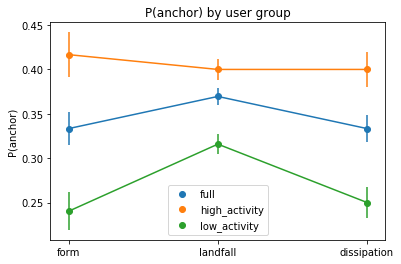

In [126]:
## make botplot of per-NE data
for data_type_i, anchor_per_NE_pcts_i in anchor_per_NE_pcts.groupby('data_type'):
    anchor_per_NE_pcts_i_vals = [anchor_per_NE_pcts_i[anchor_per_NE_pcts_i.loc[:, 'time_period']==x].loc[:, '%s_pct'%(dep_var)] for x in time_periods]
    make_boxplot(anchor_per_NE_pcts_i_vals, X, time_periods, data_name='P(anchor) by user group', dep_var='anchor', label=data_type_i)
plt.legend(loc='lower center')
plt.show()

### Sub-period comparison

Same thing but with early/late periods for each period. Could lead to data sparsity but w/e.

In [100]:
combined_data_time = []
time_period_var = 'time_period_type'
date_var = 'date'
group_var = 'data_name_fixed'
N_bins = 2
for data_name_i, data_i in combined_data.groupby(group_var):
    for time_period_j, data_j in data_i.groupby(time_period_var):
        data_j = data_j[data_j.loc[:, 'date'].apply(lambda x: not np.isnan(x))]
        time_bin_vals = np.linspace(data_j.loc[:, date_var].min(), data_j.loc[:, date_var].max(), num=N_bins+1)[:-1]
        time_bins = np.digitize(data_j.loc[:, date_var], bins=time_bin_vals, right=False)
        data_j = data_j.assign(**{'%s_bin'%(time_period_var) : ['%s_%d'%(time_period_j, x) for x in time_bins]})
        combined_data_time.append(data_j)
combined_data_time = pd.concat(combined_data_time, axis=0)
display(combined_data_time.head())

,id,txt,data_name_fixed,username,date,lang,NE,NE_type,NE_LOC,valid_loc,NE_fixed,has_descriptor,NE_fixed_clean,max_population,max_alternate_name_count,max_population_anchor,max_population_diff,max_alternate_name_count_anchor,max_alternate_name_count_diff,dissipation,form,landfall,since_form,since_landfall,since_dissipation,time_period_type,max_pop,max_names,max_pop_bin,max_names_bin,username_rt,username_fixed,time_period_type_bin
186,1042205022707220480,PSA: some friends of mine here in Raleigh have...,florence,scottlincicome,1.537316e+09,en,Raleigh,LOCATION,True,True,raleigh,False,raleigh,451066.0,43.0,True,8160301.0,True,124.0,2018-09-19,2018-08-31,2018-09-14,19.009433,5.009433,0.009433,dissipation,451066.0,43.0,3,3,,scottlincicome,dissipation_1
187,1042210399347716096,"Currently unable to get home from my vacation,...",florence,Pamelibrariland,1.537317e+09,en,Raleigh,LOCATION,True,True,raleigh,False,raleigh,451066.0,43.0,False,0.0,False,0.0,2018-09-19,2018-08-31,2018-09-14,19.024271,5.024271,0.024271,dissipation,451066.0,43.0,3,3,,Pamelibrariland,dissipation_1
188,1042212901606633472,RALEIGH area if you're interested in donating ...,florence,ReawakeBrillian,1.537318e+09,en,RALEIGH,LOCATION,True,True,raleigh,False,raleigh,451066.0,43.0,False,0.0,False,0.0,2018-09-19,2018-08-31,2018-09-14,19.031169,5.031169,0.031169,dissipation,451066.0,43.0,3,3,,ReawakeBrillian,dissipation_1
189,1042235792641413121,We finally saw the sun again Monday after #hur...,florence,word_working,1.537323e+09,en,Raleigh,LOCATION,True,True,raleigh,True,raleigh,451066.0,43.0,True,8160301.0,True,124.0,2018-09-19,2018-08-31,2018-09-14,19.094340,5.094340,0.094340,dissipation,451066.0,43.0,3,3,,word_working,dissipation_1
190,1042247013084090368,How do I get to Raleigh from Fayetteville with...,florence,Braeden1994,1.537326e+09,en,Raleigh,LOCATION,True,True,raleigh,False,raleigh,451066.0,43.0,False,0.0,False,0.0,2018-09-19,2018-08-31,2018-09-14,19.125301,5.125301,0.125301,dissipation,451066.0,43.0,3,3,,Braeden1994,dissipation_1


In [101]:
print(combined_data_time.loc[:, '%s_bin'%(time_period_var)].value_counts())

landfall_1       51564
landfall_2       47960
form_2           10410
dissipation_1     9981
dissipation_2     2722
form_1             540
Name: time_period_type_bin, dtype: int64


In [127]:
top_pct = 25.
bottom_pct = 100 - top_pct
time_period_var = 'time_period_type_bin'
time_period_bins = list(combined_data_time.loc[:, time_period_var].unique())
time_var = 'date'
min_period_sample_size = 30
min_period_user_count = 10
min_shared_NEs = 5
# sort bins by time order
time_period_bins = sorted(time_period_bins, key=lambda x: combined_data_time[combined_data_time.loc[:, time_period_var]==x].loc[:, time_var].min())
dep_var = 'max_population_anchor'
# dep_var = 'max_alternate_name_count_anchor'
# dep_var = 'has_descriptor'
NE_col = 'NE_fixed'
time_periods = combined_data_time.groupby(time_period_var).apply(lambda x: x.loc[:, time_var].min())
time_periods = time_periods.sort_values(ascending=True, inplace=False).index.tolist()
p_val_upper = 0.05 / (combined_data.loc[:, data_name_var].nunique() * len(time_periods))
X = np.arange(len(time_periods))
anchor_per_NE_pcts = []

for data_name_i, data_i in combined_data_time.groupby(data_name_var):
    print('**%s**'%(data_name_i))
    anchor_per_NE_pcts_i = []
    for time_period_j in time_period_bins:
        
        ## raw anchor counts
        data_i_j = data_i[data_i.loc[:, time_period_var] == time_period_j]
#         if(data_i_j.shape[0] >= min_period_sample_size):
        if(data_i_j.loc[:, 'username_fixed'].nunique() >= min_period_user_count):
            data_i_j_anchor_pct = data_i_j.loc[:, dep_var].sum() / data_i_j.shape[0]
            print('**%s**'%(time_period_j))
            user_counts_i_j = data_i_j.loc[:, user_var].value_counts()
            user_counts_i_j_top = user_counts_i_j[user_counts_i_j > np.percentile(user_counts_i_j, top_pct)]
            users_k = user_counts_i_j_top.index.tolist()
            print('N=%d high_pct_users'%(len(users_k)))
            data_i_j_with_users = data_i_j[data_i_j.loc[:, user_var].isin(users_k)]
            data_i_j_no_users = data_i_j[~data_i_j.loc[:, user_var].isin(users_k)]
            data_i_j_with_users_anchor_count = data_i_j_with_users.loc[:, dep_var].sum()
            data_i_j_no_users_anchor_count = data_i_j_no_users.loc[:, dep_var].sum()
            data_i_j_with_users_anchor_pct = data_i_j_with_users_anchor_count / data_i_j_with_users.shape[0]
            data_i_j_no_users_anchor_pct = data_i_j_no_users_anchor_count / data_i_j_no_users.shape[0]
            print('**aggregate percents**')
            print('high_pct_user = %.3f // low_pct_user = %.3f // total = %.3f'%
                  (data_i_j_with_users_anchor_pct, data_i_j_no_users_anchor_pct, data_i_j_anchor_pct))
            anchor_diff = data_i_j_with_users_anchor_pct - data_i_j_no_users_anchor_pct
            test_stat, p_val = proportions_ztest([data_i_j_with_users_anchor_count, data_i_j_no_users_anchor_count], 
                                                 [data_i_j_with_users.shape[0], data_i_j_no_users.shape[0]])
            if(p_val < p_val_upper):
                print('diff = %.3f is significant t=%.3f (p=%.3E)'%(anchor_diff, test_stat, p_val))

            ## per-entity anchor counts
            data_i_j_NE_pcts = data_i_j.groupby(NE_col).apply(lambda x: x.loc[:, dep_var].sum() / x.shape[0])
            data_i_j_with_users_NE_pcts = data_i_j_with_users.groupby(NE_col).apply(lambda x: x.loc[:, dep_var].sum() / x.shape[0])
            data_i_j_no_users_NE_pcts = data_i_j_no_users.groupby(NE_col).apply(lambda x: x.loc[:, dep_var].sum() / x.shape[0])
            # get shared NEs
            data_i_j_shared_NEs = data_i_j_with_users_NE_pcts.index
#             data_i_j_shared_NEs = (data_i_j_with_users_NE_pcts.index & data_i_j_no_users_NE_pcts.index).tolist()
#             data_i_j_with_users_NE_pcts = data_i_j_with_users_NE_pcts.loc[data_i_j_shared_NEs]
#             data_i_j_no_users_NE_pcts = data_i_j_no_users_NE_pcts.loc[data_i_j_shared_NEs]
#             data_i_j_with_users_NE_pcts_med = data_i_j_with_users_NE_pcts.median()
#             data_i_j_no_users_NE_pcts_med = data_i_j_no_users_NE_pcts.median()
            print('**per-NE percents (N=%d)**'%(len(data_i_j_shared_NEs)))
            if(len(data_i_j_shared_NEs) > min_shared_NEs):
                print('high_pct_user = %.3f // low_pct_user = %.3f // total = %.3f'%
                      (data_i_j_with_users_NE_pcts_med, data_i_j_no_users_NE_pcts_med, data_i_j_NE_pcts.median()))
#                 anchor_diff_per_NE = (data_i_j_with_users_NE_pcts - data_i_j_no_users_NE_pcts).median()
                anchor_diff_per_NE = data_i_j_with_users_NE_pcts.median() - data_i_j_no_users_NE_pcts.median()
                test_stat, p_val = kruskal(data_i_j_with_users_NE_pcts, data_i_j_no_users_NE_pcts)
                if(p_val < p_val_upper):
                    print('diff = %.3f is significant t=%.3f (p=%.3E)'%(anchor_diff_per_NE, test_stat, p_val))
                ## reconfigure data
                ## NE | time_period | data_type
                for data_pct, data_type in zip([data_i_j_NE_pcts, data_i_j_with_users_NE_pcts, data_i_j_no_users_NE_pcts],
                                               ['full', 'high_activity', 'low_activity']):
                    data_pct = pd.DataFrame(data_pct).assign(**{'time_period' : time_period_j, 'data_type' : data_type, 'data_name' : data_name_i, 'NE' : data_pct.index}).rename(columns={0:'%s_pct'%(dep_var)})
                    data_pct.index = np.arange(data_pct.shape[0])
                    anchor_per_NE_pcts_i.append(data_pct)
    anchor_per_NE_pcts += anchor_per_NE_pcts_i
anchor_per_NE_pcts = pd.concat(anchor_per_NE_pcts, axis=0)
# display(anchor_per_NE_pcts.head())

**florence**
**form_2**
N=64 high_pct_users
**aggregate percents**
high_pct_user = 0.522 // low_pct_user = 0.430 // total = 0.460
**per-NE percents (N=30)**
high_pct_user = 0.500 // low_pct_user = 0.417 // total = 0.481
**landfall_1**
N=178 high_pct_users
**aggregate percents**
high_pct_user = 0.464 // low_pct_user = 0.491 // total = 0.478
**per-NE percents (N=49)**
high_pct_user = 0.500 // low_pct_user = 0.417 // total = 0.496
**landfall_2**
N=315 high_pct_users
**aggregate percents**
high_pct_user = 0.512 // low_pct_user = 0.381 // total = 0.447
diff = 0.131 is significant t=5.674 (p=1.393E-08)
**per-NE percents (N=60)**
high_pct_user = 0.500 // low_pct_user = 0.417 // total = 0.500
**dissipation_1**
N=250 high_pct_users
**aggregate percents**
high_pct_user = 0.499 // low_pct_user = 0.370 // total = 0.435
diff = 0.128 is significant t=5.060 (p=4.189E-07)
**per-NE percents (N=59)**
high_pct_user = 0.500 // low_pct_user = 0.417 // total = 0.450
**dissipation_2**
N=95 high_pct_users
**a

/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in long_scalars
/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/statsmodels/stats/proportion.py:823: RuntimeWarning: invalid value encountered in true_divide
  prop = count * 1. / nobs
/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/statsmodels/stats/proportion.py:839: RuntimeWarning: divide by zero encountered in true_divide
  nobs_fact = np.sum(1. / nobs)


**per-NE percents (N=32)**
high_pct_user = 0.500 // low_pct_user = 0.417 // total = 0.394
**landfall_2**
N=256 high_pct_users
**aggregate percents**
high_pct_user = 0.466 // low_pct_user = 0.357 // total = 0.413
diff = 0.109 is significant t=4.140 (p=3.476E-05)
**per-NE percents (N=31)**
high_pct_user = 0.500 // low_pct_user = 0.417 // total = 0.481
**dissipation_1**
N=193 high_pct_users
**aggregate percents**
high_pct_user = 0.431 // low_pct_user = 0.339 // total = 0.388
diff = 0.092 is significant t=3.196 (p=1.392E-03)
**per-NE percents (N=30)**
high_pct_user = 0.500 // low_pct_user = 0.417 // total = 0.421
**dissipation_2**
N=47 high_pct_users
**aggregate percents**
high_pct_user = 0.461 // low_pct_user = 0.368 // total = 0.410
**per-NE percents (N=15)**
high_pct_user = 0.500 // low_pct_user = 0.417 // total = 0.500


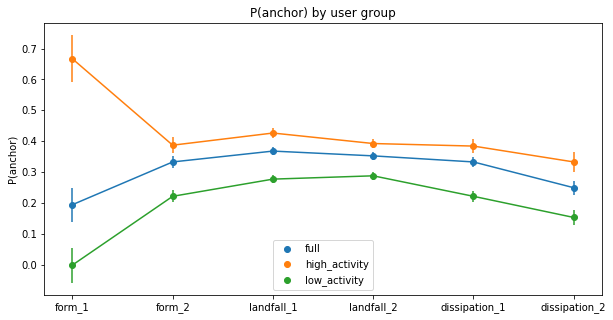

In [129]:
## make botplot of per-NE data
plt.figure(figsize=(10,5))
for data_type_i, anchor_per_NE_pcts_i in anchor_per_NE_pcts.groupby('data_type'):
    anchor_per_NE_pcts_i_vals = [anchor_per_NE_pcts_i[anchor_per_NE_pcts_i.loc[:, 'time_period']==x].loc[:, '%s_pct'%(dep_var)] for x in time_period_bins]
    make_boxplot(anchor_per_NE_pcts_i_vals, X, time_periods, data_name='P(anchor) by user group', dep_var='anchor', label=data_type_i)
plt.legend(loc='lower center')
plt.show()

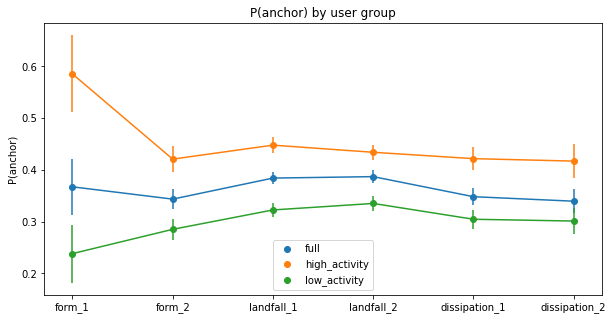

In [128]:
## using mean prob instead of median
## make botplot of per-NE data
plt.figure(figsize=(10,5))
for data_type_i, anchor_per_NE_pcts_i in anchor_per_NE_pcts.groupby('data_type'):
    anchor_per_NE_pcts_i_vals = [anchor_per_NE_pcts_i[anchor_per_NE_pcts_i.loc[:, 'time_period']==x].loc[:, '%s_pct'%(dep_var)] for x in time_period_bins]
    make_boxplot(anchor_per_NE_pcts_i_vals, X, time_periods, data_name='P(anchor) by user group', dep_var='anchor', label=data_type_i, mean_stat=np.mean, sd_stat=(lambda x: np.std(x) / x.shape[0]**.5))
plt.legend(loc='lower center')
plt.show()

Same thing but restrict to same set of NEs across all time periods within same data set.

In [147]:
top_pct = 25.
bottom_pct = 100 - top_pct
time_period_var = 'time_period_type_bin'
time_period_bins = list(combined_data_time.loc[:, time_period_var].unique())
time_var = 'date'
min_period_sample_size = 30
min_period_user_count = 10
min_NE_count_per_period = 2
# sort bins by time order
time_period_bins = sorted(time_period_bins, key=lambda x: combined_data_time[combined_data_time.loc[:, time_period_var]==x].loc[:, time_var].min())
dep_var = 'max_population_anchor'
# dep_var = 'max_alternate_name_count_anchor'
# dep_var = 'has_descriptor'
NE_col = 'NE_fixed'
time_periods = combined_data_time.groupby(time_period_var).apply(lambda x: x.loc[:, time_var].min())
time_periods = time_periods.sort_values(ascending=True, inplace=False).index.tolist()
p_val_upper = 0.05 / (combined_data.loc[:, data_name_var].nunique() * len(time_periods))
X = np.arange(len(time_periods))
anchor_per_NE_pcts = []
example_users = 10
example_posts = 10

for data_name_i, data_i in combined_data_time.groupby(data_name_var):
    print('**%s**'%(data_name_i))
    anchor_per_NE_pcts_i = []
    # restrict NEs that occur at least X times per period
    shared_NEs_i = data_i.groupby(NE_col).apply(lambda x: np.all(x.loc[:, time_period_var].value_counts() >= min_NE_count_per_period))
    shared_NEs_i = set(shared_NEs_i[shared_NEs_i].index.tolist())
    print('%d shared NEs'%(len(shared_NEs_i)))
    print(data_i[data_i.loc[:, NE_col].isin(shared_NEs_i)].loc[:, NE_col].value_counts().head(10))
    for time_period_j in time_period_bins:
        ## raw anchor counts
        data_i_j = data_i[data_i.loc[:, time_period_var] == time_period_j]
        if(data_i_j.shape[0] >= min_period_sample_size):
#         if(data_i_j.loc[:, 'username_fixed'].nunique() >= min_period_user_count):
            data_i_j_anchor_pct = data_i_j.loc[:, dep_var].sum() / data_i_j.shape[0]
            print('**%s**'%(time_period_j))
            user_counts_i_j = data_i_j.loc[:, user_var].value_counts()
            user_counts_i_j_high = user_counts_i_j[user_counts_i_j > np.percentile(user_counts_i_j, top_pct)]
            user_counts_i_j_low = user_counts_i_j[user_counts_i_j <= np.percentile(user_counts_i_j, top_pct)]
            users_i_j_high = user_counts_i_j_high.index.tolist()
            users_i_j_low = user_counts_i_j_low.index.tolist()
            print('N=%d high_pct_users, N=%d low_pct_users'%(len(users_i_j_high), len(users_i_j_low)))
            # show example high-activity users
            print('example high activity users')
            print('\n'.join(users_i_j_high[:example_users]))
            print('example low activity users')
            print('\n'.join(users_i_j_low[-example_users:]))
            data_i_j_high_users = data_i_j[data_i_j.loc[:, user_var].isin(users_i_j_high)]
            data_i_j_low_users = data_i_j[data_i_j.loc[:, user_var].isin(users_i_j_low)]
            # show example posts with anchor by low-activity users
            print('example high activity user anchor posts')
            print(data_i_j_high_users[data_i_j_high_users.loc[:, dep_var]==1].loc[:, [user_var, 'txt']].head(example_posts).values)
            print('example low activity user anchor posts')
            print(data_i_j_low_users[data_i_j_low_users.loc[:, dep_var]==1].loc[:, [user_var, 'txt']].head(example_posts).values)
            data_i_j_high_users_anchor_count = data_i_j_high_users.loc[:, dep_var].sum()
            data_i_j_low_users_anchor_count = data_i_j_low_users.loc[:, dep_var].sum()
            data_i_j_high_users_anchor_pct = data_i_j_high_users_anchor_count / data_i_j_high_users.shape[0]
            data_i_j_low_users_anchor_pct = data_i_j_low_users_anchor_count / data_i_j_low_users.shape[0]
            print('**aggregate percents**')
            print('high_pct_user = %.3f // low_pct_user = %.3f // total = %.3f'%
                  (data_i_j_high_users_anchor_pct, data_i_j_low_users_anchor_pct, data_i_j_anchor_pct))
            anchor_diff = data_i_j_high_users_anchor_pct - data_i_j_low_users_anchor_pct
            test_stat, p_val = proportions_ztest([data_i_j_high_users_anchor_count, data_i_j_low_users_anchor_count], 
                                                 [data_i_j_high_users.shape[0], data_i_j_low_users.shape[0]])
            if(p_val < p_val_upper):
                print('diff = %.3f is significant t=%.3f (p=%.3E)'%(anchor_diff, test_stat, p_val))

            ## per-entity anchor counts
            data_i_j_NE_pcts = data_i_j.groupby(NE_col).apply(lambda x: x.loc[:, dep_var].sum() / x.shape[0])
            data_i_j_high_users_NE_pcts = data_i_j_high_users.groupby(NE_col).apply(lambda x: x.loc[:, dep_var].sum() / x.shape[0])
            data_i_j_low_users_NE_pcts = data_i_j_low_users.groupby(NE_col).apply(lambda x: x.loc[:, dep_var].sum() / x.shape[0])
            # get shared NEs
#             data_i_j_shared_NEs = data_i_j_high_users_NE_pcts.index
#             data_i_j_shared_NEs = (data_i_j_high_users_NE_pcts.index & data_i_j_low_users_NE_pcts.index).tolist()
            shared_NEs_i_j = shared_NEs_i & set((data_i_j_high_users_NE_pcts.index & data_i_j_low_users_NE_pcts.index).tolist())
            data_i_j_high_users_NE_pcts = data_i_j_high_users_NE_pcts.loc[shared_NEs_i_j]
            data_i_j_low_users_NE_pcts = data_i_j_low_users_NE_pcts.loc[shared_NEs_i_j]
            data_i_j_high_users_NE_pcts_med = data_i_j_high_users_NE_pcts.median()
            data_i_j_low_users_NE_pcts_med = data_i_j_low_users_NE_pcts.median()
            print('**per-NE percents (N=%d)**'%(len(shared_NEs_i_j)))
            if(len(data_i_j_shared_NEs) > min_shared_NEs):
                print('high_pct_user = %.3f // low_pct_user = %.3f // total = %.3f'%
                      (data_i_j_high_users_NE_pcts_med, data_i_j_low_users_NE_pcts_med, data_i_j_NE_pcts.median()))
                anchor_diff_per_NE = (data_i_j_high_users_NE_pcts - data_i_j_low_users_NE_pcts).median()
#                 anchor_diff_per_NE = data_i_j_high_users_NE_pcts.median() - data_i_j_low_users_NE_pcts.median()
                test_stat, p_val = kruskal(data_i_j_high_users_NE_pcts, data_i_j_low_users_NE_pcts)
                if(p_val < p_val_upper):
                    print('diff = %.3f is significant t=%.3f (p=%.3E)'%(anchor_diff_per_NE, test_stat, p_val))
                ## reconfigure data
                ## NE | time_period | data_type
                for data_pct, data_type in zip([data_i_j_NE_pcts, data_i_j_high_users_NE_pcts, data_i_j_low_users_NE_pcts],
                                               ['full', 'high_activity', 'low_activity']):
                    data_pct = pd.DataFrame(data_pct).assign(**{'time_period' : time_period_j, 'data_type' : data_type, 'data_name' : data_name_i, 'NE' : data_pct.index}).rename(columns={0:'%s_pct'%(dep_var)})
                    data_pct.index = np.arange(data_pct.shape[0])
                    anchor_per_NE_pcts_i.append(data_pct)
    anchor_per_NE_pcts += anchor_per_NE_pcts_i
anchor_per_NE_pcts = pd.concat(anchor_per_NE_pcts, axis=0)
# # display(anchor_per_NE_pcts.head())

**florence**
34 shared NEs
wilmington            1245
new_bern               434
myrtle_beach           298
carolina               289
fayetteville           253
charlotte              234
lumberton              199
conway                 161
charleston             142
wrightsville_beach     132
Name: NE_fixed, dtype: int64
**form_2**
N=64 high_pct_users, N=381 low_pct_users
example high activity users
RyanJones229
charitycrabtree
AdamOwensTV
MikeTheiss
AndyShain
WJXT4Jonathan
aljoneswins
kathycalm
Alhenkel
HoldenCBS17
example low activity users
theJoshBanks
JoelBrownABC11
BobcatRenee
Marcelo77931223
heyy_jennyy
VancouverViking
therealwesjones
waxingcamelias
Rodcox84
aallington
example high activity user anchor posts
[['kathycalm'
  'RT @EdValleeWx: Population density map overlaid with track and city names ahead of #Florence. Wilmington, Charlotte, Raleigh all in its pat…']
 ['matthaverkamp'
  'Need my fix before #hurricaneflorence (@ Starbucks in Raleigh, NC) <URL>']
 ['matthaverkamp'

**per-NE percents (N=31)**
high_pct_user = 0.516 // low_pct_user = 0.364 // total = 0.500
**dissipation_1**
N=250 high_pct_users, N=759 low_pct_users
example high activity users
USACEHQ
WatchAmandaTV
NickOchsnerWBTV
ai6yrham
GloriaABC11
FrankWilliams
NeuseNews
postandcourier
brandilmelb
wheelofhopefdn
example low activity users
FlyoverProject
EducationNC
TravelPiratesUS
mdjonline
NaphiSoc
NickCarboniWCNC
NewBernMarina1
hmbryan
larkin1235
BaltimoreFire
example high activity user anchor posts
[['scottlincicome'
  'PSA: some friends of mine here in Raleigh have started a ""citizens charity"" to support their hometown of New Bern, NC, which was just crushed by #Florence . If you have a few spare bucks or an Amazon account, pls consider helping out: <URL>']
 ['USACEHQ'
  'A Deployable Tactical Operations System (DTOS) arrived at the state emergency operations center in Raleigh, NC, yesterday. The system serves as an emergency command & control center in the event of significant man-made or 

**per-NE percents (N=21)**
high_pct_user = 0.607 // low_pct_user = 0.429 // total = 0.500
**harvey**
50 shared NEs
houston           37645
corpus_christi     3599
rockport           2930
austin             1859
san_antonio        1288
galveston          1125
port_aransas       1001
new_orleans         798
port_arthur         638
dickinson           376
Name: NE_fixed, dtype: int64
**form_1**
N=59 high_pct_users, N=218 low_pct_users
example high activity users
joshuatcarley
abc13houston
HoustonPubMedia
JohnHonore
EdMahmoud
AaronKPRC
EricHolthaus
RaleighWx
Jackson_Dill
tv_leader
example low activity users
rawrritsmeagain
WK_Rodriguez
LubbockSam
k_knox
19Megs83
Helicity300
LiveStormChaser
mmaribel63
ChrisB_Brown
donwhilty
example high activity user anchor posts
[['EdMahmoud'
  'Looking at @weatherbell #ECMWF rain, 10 to 20 inches lower Brazos, Colorado and San Antonio river basins in Texas w/ #Harvey would be crazy.']
 ['hurrtrackerapp'
  '12Z EURO has #Harvey visting the Riverwalk in San

**per-NE percents (N=47)**
high_pct_user = 0.444 // low_pct_user = 0.304 // total = 0.400
**landfall_2**
N=1654 high_pct_users, N=8593 low_pct_users
example high activity users
THUTO
statesman
REALDANIELGLENN
g_ashleyhawkins
souperfan2012
livechannelfeed
keithcampbell48
randibaker01
CBSThisMorning
ch1election
example low activity users
agingsense1
CharlieDeMar
evanscottolson
freddyo
EricHighland
LSearcLex
Marie_marito
BandedBrigade
CarltechUSA
RedPillLatino
example high activity user anchor posts
[['davidar94'
  'Charter busses on I-10 heading from San Antonio twords Houston #Harvey #HopeForHouston <URL>']
 ['jpalacios412'
  '@Target employee from San Antonio & his dad, with his own boat, rescuing #HurricaneHarvey evacuees in Houston area <URL>']
 ['museofhistory'
  'Folks in Dallas, San Antonio, Austin, we need to be preparing to welcome our #HurricaneCousins into our homes for a while. #Harvey #TEXAS']
 ['NemonLomax'
  'Trying to get off this @CarnivalCruise . Docked in N.O. wife and

81 shared NEs
miami           11272
tampa            4484
marco_island     1602
atlanta          1524
jacksonville     1288
houston          1067
charleston        839
fort_myers        784
sarasota          568
tallahassee       531
Name: NE_fixed, dtype: int64
**form_1**
N=9 high_pct_users, N=88 low_pct_users
example high activity users
CommentOnTWLB
adamspotterson2
jetsolaire
EvaBarkoff
pipercarter
TheStormologist
LarryToweTV
glenbenjamin
PointsofLight
example low activity users
wxgarrett
Remonggg
LeBondAZ
hersheygirl2313
MAlGhadhouri
g_grayzz
kat8387
wendria
boogiefinger
lamacode88
example high activity user anchor posts
[['pipercarter'
  '#Repost jahluqdah Heads Up!!! #hurricaneirma Houston. Mumbai. Niger. All within the past… <URL>']
 ['pipercarter'
  '#Repost @jahluqdah Heads Up!!! #hurricaneirma Houston. Mumbai. Niger. All within the past week. #ClimateChange <URL>']
 ['CommentOnTWLB'
  'Sandy: NYC/NJ. Katrina: New Orleans. Harvey: Houston/SE TX. Whos number is up for #Irma ? M

**per-NE percents (N=74)**
high_pct_user = 0.408 // low_pct_user = 0.229 // total = 0.331
diff = 0.120 is significant t=13.000 (p=3.116E-04)
**landfall_2**
N=4088 high_pct_users, N=11612 low_pct_users
example high activity users
SimpleWeatherFL
channel1america
JRiz11
CyberAnonymous
kkfla737
hurricanenewsus
bluestreakdaily
WSTU1450
kotaknaren
torrea40
example low activity users
go4gin
Wander_Roam
wvredlegs
Kdolney711
StoneyStone062
DrMarzouka
jobrl
daynavettese
TeamTrumpCT
nin373
example high activity user anchor posts
[['AlabamaEMA'
  '@NWSTallahassee has issued a Tropical Storm Watch for some AL Counties: Coffee, Dale, Henry, Geneva and Houston #Irma #PlanAhead']
 ['AlabamaEMA'
  '. @NWSTallahassee has issued a Tropical Storm Watch for some AL Counties: Coffee, Dale, Henry, Geneva and Houston #Irma #PlanAhead']
 ['MattChris973'
  'Prayers up for the people in all affected areas. The islands, Miami, Cuba, Houston... #HurricaneIrma']
 ['MattSmithWXYZ'
  'First #HurricaneHarvey hits Hous

**per-NE percents (N=4)**
high_pct_user = 0.000 // low_pct_user = 0.250 // total = 0.167
**landfall_1**
N=156 high_pct_users, N=790 low_pct_users
example high activity users
ThePRMonitor
MrRJervis
ASE
webdude20
BookPuertoRico
G_GarciaMarquez
DorielleRivera
ada11perez
PRClimate
luisferre
example low activity users
ATLBlackStar
fercho979
DonCiesRE
CharlieWGME
natycar74
topaz8100
hisnhearn
DoreenColondres
RobMawdsley
Pedro_Rafael3
example high activity user anchor posts
[['jamesaydelott'
  'Eye of #Hurricane #Maria in view of 88d near San Juan. Cat 5, winds of 160mph. Expected to hit Puerto Rico Wed #prwx <URL>']
 ['DrewTumaABC7'
  '#Maria currently has winds of 160mph. Already feeling 40+mph winds on USVI. 185 miles SE of San Juan, Puerto Rico. <URL>']
 ['DrewTumaABC7'
  'JUST IN Winds have increased to 175mph within #Maria 165 miles away from San Juan, Puerto Rico. <URL>']
 ['CellosSuits'
  'Puerto Rico: Officials suggest power grid may be abandoned after Hurricane #Maria destroys San J

**per-NE percents (N=4)**
high_pct_user = 0.218 // low_pct_user = 0.145 // total = 0.111
**michael**
17 shared NEs
tallahassee          481
panama_city_beach    357
gulf_county           90
atlanta               68
jackson_county        65
destin                65
calhoun_county        37
greensboro            36
apalachicola          36
franklin              32
Name: NE_fixed, dtype: int64
**form_2**
N=20 high_pct_users, N=76 low_pct_users
example high activity users
Kirsten_TV
amlikethewind
lizgoldtv
DustinRDaniels
WJXTvic
kkfla737
fbaoregon
TerryF2608
TevinWooten
grayrobinsonlaw
example low activity users
Jon_Shaban
VARedCross
agape_box
igptp
LarissaWVTM13
AKeyesPR
JasonMHendrix
BelyndaJMedia
gbrailyn
MsuPipkin
example high activity user anchor posts
[['DISCVillageInc'
  'Due to #hurricanemichael our outpatient and case management offices will be closed through Thursday October 11.  Stay safe Tallahassee! @ Tallahassee, Florida <URL>']
 ['DISCVillageInc'
  'Due to #hurricanemichael 

[['staplesagency'
  'Our mobile catastrophe response units (CRU) are open at: Home Depot, 1490 Capital Circle NW Tallahassee, FL. 32303 & Home Depot Store #155, 1219 North Westover Blvd. Albany, GA 31707. Visit <URL>']
 ['tenthirtyam'
  'After Hurricane Irma, our debris was never picked up by the Osceola County or @fema. We had to haul it ourselves.After #HurricaneMichael, the City of Tallahassee picked it up before our next yard waste pickup. Amazing! 👍🏻 @COTNews @AndrewGillum']
 ['carlossewing'
  'Got some new wax today. 2 #classicalbums #mariahcarey #alliwantforchristmas #songbirdsupreme #michaeljackson #thriller #mj #kingofpop #christmas #halloween @ Orlando, Florida <URL>']
 ['UCAOA'
  "#ShoutoutSaturday to UCA Members CarePlusUrgent Care with 4 locations in Alabama. They've deployed a medical care unit and staff to Panama City Beach to aid in the relief of #HurricaneMichael . For info, including donations, visit: <URL>"]
 ['toddallenshow'
  'Doors 6pm. Admission Free, just bring 

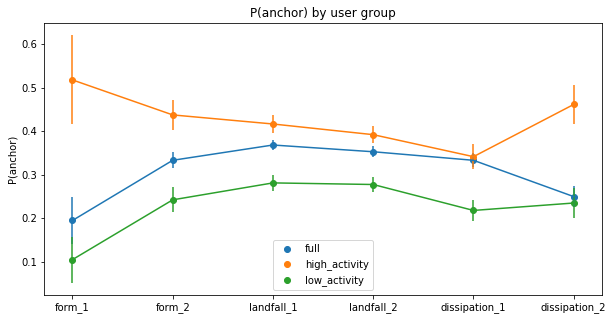

In [140]:
## make botplot of per-NE data
plt.figure(figsize=(10,5))
for data_type_i, anchor_per_NE_pcts_i in anchor_per_NE_pcts.groupby('data_type'):
    anchor_per_NE_pcts_i_vals = [anchor_per_NE_pcts_i[anchor_per_NE_pcts_i.loc[:, 'time_period']==x].loc[:, '%s_pct'%(dep_var)] for x in time_period_bins]
    make_boxplot(anchor_per_NE_pcts_i_vals, X, time_periods, data_name='P(anchor) by user group', dep_var='anchor', label=data_type_i)
plt.legend(loc='lower center')
plt.show()

Sanity check: use `has_descriptor`

**florence**
34 shared NEs
wilmington            1245
new_bern               434
myrtle_beach           298
carolina               289
fayetteville           253
charlotte              234
lumberton              199
conway                 161
charleston             142
wrightsville_beach     132
Name: NE_fixed, dtype: int64
**form_2**
N=64 high_pct_users
**aggregate percents**
high_pct_user = 0.331 // low_pct_user = 0.378 // total = 0.363
**per-NE percents (N=18)**
high_pct_user = 0.283 // low_pct_user = 0.407 // total = 0.333
**landfall_1**
N=178 high_pct_users
**aggregate percents**
high_pct_user = 0.307 // low_pct_user = 0.431 // total = 0.374
diff = -0.124 is significant t=-4.368 (p=1.255E-05)
**per-NE percents (N=26)**
high_pct_user = 0.250 // low_pct_user = 0.400 // total = 0.360
**landfall_2**
N=315 high_pct_users
**aggregate percents**
high_pct_user = 0.295 // low_pct_user = 0.319 // total = 0.307
**per-NE percents (N=31)**
high_pct_user = 0.260 // low_pct_user = 0.333 // total

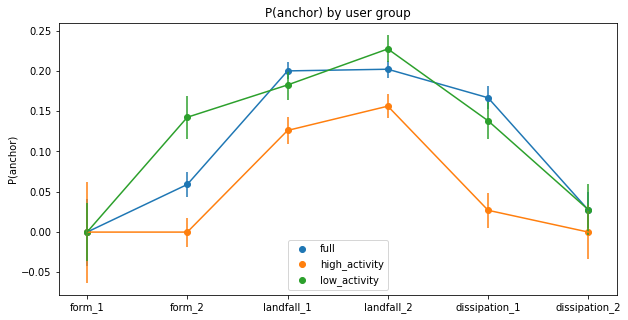

In [143]:
top_pct = 25.
bottom_pct = 100 - top_pct
time_period_var = 'time_period_type_bin'
time_period_bins = list(combined_data_time.loc[:, time_period_var].unique())
time_var = 'date'
min_period_sample_size = 30
min_period_user_count = 10
min_NE_count_per_period = 2
# sort bins by time order
time_period_bins = sorted(time_period_bins, key=lambda x: combined_data_time[combined_data_time.loc[:, time_period_var]==x].loc[:, time_var].min())
# dep_var = 'max_population_anchor'
# dep_var = 'max_alternate_name_count_anchor'
dep_var = 'has_descriptor'
NE_col = 'NE_fixed'
time_periods = combined_data_time.groupby(time_period_var).apply(lambda x: x.loc[:, time_var].min())
time_periods = time_periods.sort_values(ascending=True, inplace=False).index.tolist()
p_val_upper = 0.05 / (combined_data.loc[:, data_name_var].nunique() * len(time_periods))
X = np.arange(len(time_periods))
anchor_per_NE_pcts = []
example_users = 10

for data_name_i, data_i in combined_data_time.groupby(data_name_var):
    print('**%s**'%(data_name_i))
    anchor_per_NE_pcts_i = []
    # restrict NEs that occur at least X times per period
    shared_NEs_i = data_i.groupby(NE_col).apply(lambda x: np.all(x.loc[:, time_period_var].value_counts() >= min_NE_count_per_period))
    shared_NEs_i = set(shared_NEs_i[shared_NEs_i].index.tolist())
    print('%d shared NEs'%(len(shared_NEs_i)))
    print(data_i[data_i.loc[:, NE_col].isin(shared_NEs_i)].loc[:, NE_col].value_counts().head(10))
    for time_period_j in time_period_bins:
        ## raw anchor counts
        data_i_j = data_i[data_i.loc[:, time_period_var] == time_period_j]
        if(data_i_j.shape[0] >= min_period_sample_size):
#         if(data_i_j.loc[:, 'username_fixed'].nunique() >= min_period_user_count):
            data_i_j_anchor_pct = data_i_j.loc[:, dep_var].sum() / data_i_j.shape[0]
            print('**%s**'%(time_period_j))
            user_counts_i_j = data_i_j.loc[:, user_var].value_counts()
            user_counts_i_j_high = user_counts_i_j[user_counts_i_j > np.percentile(user_counts_i_j, top_pct)]
            user_counts_i_j_low = user_counts_i_j[user_counts_i_j <= np.percentile(user_counts_i_j, top_pct)]
            users_high_k = user_counts_i_j_high.index.tolist()
            print('N=%d high_pct_users'%(len(users_k)))
            # show example high-activity users
            print('example high activity users')
            print('\n'.join(users_high_k[:example_users]))
            print('example low activity users')
            print('\n'.join(user_counts_i_j_low.index[-example_users:]))
            data_i_j_high_users = data_i_j[data_i_j.loc[:, user_var].isin(users_high_k)]
            data_i_j_low_users = data_i_j[~data_i_j.loc[:, user_var].isin(users_high_k)]
            data_i_j_high_users_anchor_count = data_i_j_high_users.loc[:, dep_var].sum()
            data_i_j_low_users_anchor_count = data_i_j_low_users.loc[:, dep_var].sum()
            data_i_j_high_users_anchor_pct = data_i_j_high_users_anchor_count / data_i_j_high_users.shape[0]
            data_i_j_low_users_anchor_pct = data_i_j_low_users_anchor_count / data_i_j_low_users.shape[0]
            print('**aggregate percents**')
            print('high_pct_user = %.3f // low_pct_user = %.3f // total = %.3f'%
                  (data_i_j_high_users_anchor_pct, data_i_j_low_users_anchor_pct, data_i_j_anchor_pct))
            anchor_diff = data_i_j_high_users_anchor_pct - data_i_j_low_users_anchor_pct
            test_stat, p_val = proportions_ztest([data_i_j_high_users_anchor_count, data_i_j_low_users_anchor_count], 
                                                 [data_i_j_high_users.shape[0], data_i_j_low_users.shape[0]])
            if(p_val < p_val_upper):
                print('diff = %.3f is significant t=%.3f (p=%.3E)'%(anchor_diff, test_stat, p_val))

            ## per-entity anchor counts
            data_i_j_NE_pcts = data_i_j.groupby(NE_col).apply(lambda x: x.loc[:, dep_var].sum() / x.shape[0])
            data_i_j_high_users_NE_pcts = data_i_j_high_users.groupby(NE_col).apply(lambda x: x.loc[:, dep_var].sum() / x.shape[0])
            data_i_j_low_users_NE_pcts = data_i_j_low_users.groupby(NE_col).apply(lambda x: x.loc[:, dep_var].sum() / x.shape[0])
            # get shared NEs
#             data_i_j_shared_NEs = data_i_j_high_users_NE_pcts.index
#             shared_NEs_i_j = (data_i_j_high_users_NE_pcts.index & data_i_j_low_users_NE_pcts.index).tolist()
            shared_NEs_i_j = shared_NEs_i & set((data_i_j_high_users_NE_pcts.index & data_i_j_low_users_NE_pcts.index).tolist())
            
            data_i_j_high_users_NE_pcts = data_i_j_high_users_NE_pcts.loc[shared_NEs_i_j]
            data_i_j_low_users_NE_pcts = data_i_j_low_users_NE_pcts.loc[shared_NEs_i_j]
            data_i_j_high_users_NE_pcts_med = data_i_j_high_users_NE_pcts.median()
            data_i_j_low_users_NE_pcts_med = data_i_j_low_users_NE_pcts.median()
            print('**per-NE percents (N=%d)**'%(len(shared_NEs_i_j)))
            if(len(data_i_j_shared_NEs) > min_shared_NEs):
                print('high_pct_user = %.3f // low_pct_user = %.3f // total = %.3f'%
                      (data_i_j_high_users_NE_pcts_med, data_i_j_low_users_NE_pcts_med, data_i_j_NE_pcts.median()))
                anchor_diff_per_NE = (data_i_j_high_users_NE_pcts - data_i_j_low_users_NE_pcts).median()
#                 anchor_diff_per_NE = data_i_j_high_users_NE_pcts.median() - data_i_j_low_users_NE_pcts.median()
                test_stat, p_val = kruskal(data_i_j_high_users_NE_pcts, data_i_j_low_users_NE_pcts)
                if(p_val < p_val_upper):
                    print('diff = %.3f is significant t=%.3f (p=%.3E)'%(anchor_diff_per_NE, test_stat, p_val))
                ## reconfigure data
                ## NE | time_period | data_type
                for data_pct, data_type in zip([data_i_j_NE_pcts, data_i_j_high_users_NE_pcts, data_i_j_low_users_NE_pcts],
                                               ['full', 'high_activity', 'low_activity']):
                    data_pct = pd.DataFrame(data_pct).assign(**{'time_period' : time_period_j, 'data_type' : data_type, 'data_name' : data_name_i, 'NE' : data_pct.index}).rename(columns={0:'%s_pct'%(dep_var)})
                    data_pct.index = np.arange(data_pct.shape[0])
                    anchor_per_NE_pcts_i.append(data_pct)
    anchor_per_NE_pcts += anchor_per_NE_pcts_i
anchor_per_NE_pcts = pd.concat(anchor_per_NE_pcts, axis=0)
# # display(anchor_per_NE_pcts.head())
## make botplot of per-NE data
plt.figure(figsize=(10,5))
for data_type_i, anchor_per_NE_pcts_i in anchor_per_NE_pcts.groupby('data_type'):
    anchor_per_NE_pcts_i_vals = [anchor_per_NE_pcts_i[anchor_per_NE_pcts_i.loc[:, 'time_period']==x].loc[:, '%s_pct'%(dep_var)] for x in time_period_bins]
    make_boxplot(anchor_per_NE_pcts_i_vals, X, time_periods, data_name='P(anchor) by user group', dep_var='anchor', label=data_type_i)
plt.legend(loc='lower center')
plt.show()

## Bin by follower/follower_friend
Let's do the same thing as before, but bin the users by audience size to see who's driving the overall effects.

In [ ]:
from predict_descriptor_in_twitter import add_us